<a href="https://www.kaggle.com/code/adelinmil/data-centric-way-eda-outliers-fs?scriptVersionId=141374512" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 20)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

import math
import scipy.stats as ss

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s3e21/sample_submission.csv')

data.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


## EDA

In [3]:
# report = ProfileReport(df = sample_submission, title = 'Dissolved-oxygen-prediction-in-river-waters-report')

# report.to_file('Dissolved-oxygen-prediction-in-river-waters-report.html')

## Baseline

In [4]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

In [5]:
X, y = data.drop('target', axis = 1), data.target

scores = cross_val_score(rf, 
                         X, 
                         y,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE (BASELINE): {scores.mean()}')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RMSE (BASELINE): -1.3770624373999154


## Outliers Detection

In [6]:
iso = IsolationForest(random_state = 0)
yhat = iso.fit_predict(data.drop('id', axis = 1))

print('Outliers detected (Isolation Forest): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_ISO = data.loc[mask, :]

X_ISO, Y_ISO = data_ISO.drop("target", axis=1), data_ISO.target

scores = cross_val_score(rf, 
                         X_ISO,
                         Y_ISO,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE (Isolation Forest): {scores.mean()}')

Outliers detected (Isolation Forest): 87
RMSE (Isolation Forest): -1.3655014671826504


In [7]:
svm = OneClassSVM()
yhat = svm.fit_predict(data_ISO.drop('id', axis = 1))

print('Outliers detected (One Class SVM): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_SVM = data_ISO.loc[mask, :]

X_SVM, Y_SVM = data_SVM.drop('target', axis = 1), data_SVM.target

scores = cross_val_score(rf, 
                         X_SVM,
                         Y_SVM,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE (One Class SVM): {scores.mean()}')

Outliers detected (One Class SVM): 1707
RMSE (One Class SVM): -0.9241522717135602


In [8]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data_SVM.drop('id', axis = 1))

print('Outliers detected (Local Outlier Factor): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_LOF = data_SVM.loc[mask, :]

X_LOF, Y_LOF = data_LOF.drop('target', axis = 1), data_LOF.target

scores = cross_val_score(rf, 
                         X_LOF,
                         Y_LOF,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE (Local Outlier Factor): {scores.mean()}')

Outliers detected (Local Outlier Factor): 2
RMSE (Local Outlier Factor): -0.9201804529483544


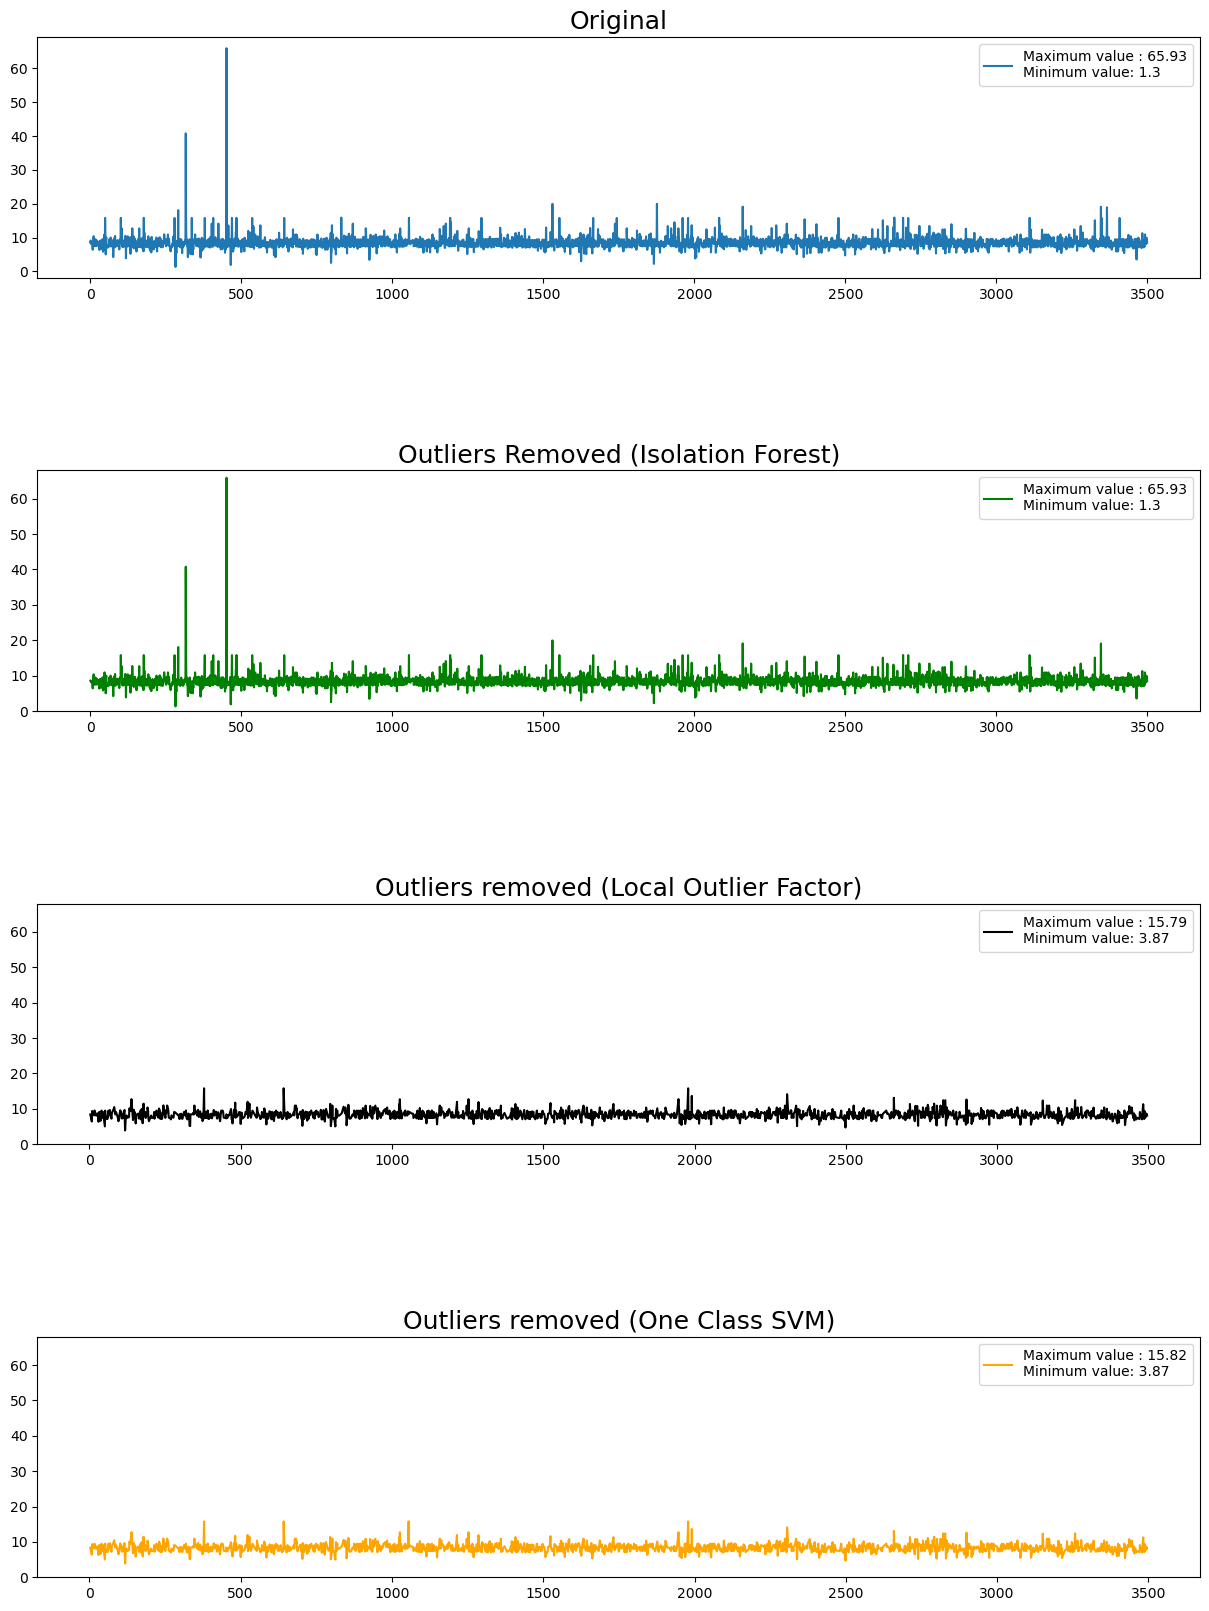

In [9]:
fig, axs = plt.subplots(4)
fig.subplots_adjust(hspace = 0.8)

axs[0].set_title('Original', fontsize = 18)
axs[0].plot(y, label = f'Maximum value : {max(y)}\nMinimum value: {min(y)}')
axs[0].legend()

axs[1].set_title('Outliers Removed (Isolation Forest)', fontsize = 18)
axs[1].set_ylim(0, 68)
axs[1].plot(Y_ISO, color = 'green', label = f'Maximum value : {max(Y_ISO)}\nMinimum value: {min(Y_ISO)}')
axs[1].legend()

axs[2].set_title('Outliers removed (Local Outlier Factor)', fontsize = 18)
axs[2].set_ylim(0, 68)
axs[2].plot(Y_LOF, color = 'black', label = f'Maximum value : {max(Y_LOF)}\nMinimum value: {min(Y_LOF)}')
axs[2].legend()

axs[3].set_title('Outliers removed (One Class SVM)', fontsize = 18)
axs[3].set_ylim(0, 68)
axs[3].plot(Y_SVM, color = 'orange', label = f'Maximum value : {max(Y_SVM)}\nMinimum value: {min(Y_SVM)}')
axs[3].legend()

In [10]:
data_7_20 = data_LOF.copy()
data_7_20.target = data_7_20.target.clip(lower = 7, upper = 20)
X_7_20, Y_7_20 = data_7_20.drop('target', axis = 1), data_7_20.target

In [11]:
rf.fit(X_7_20, Y_7_20)

imp = pd.DataFrame({'importances': rf.feature_importances_}, index = X_SVM.columns).sort_values(by = 'importances', ascending = False)

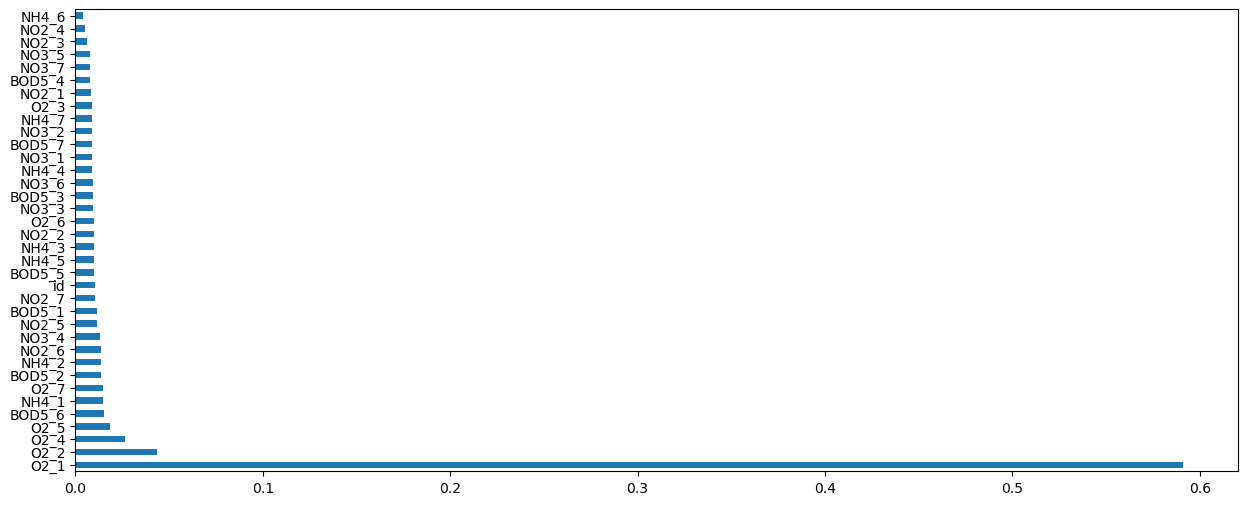

In [12]:
imp.plot(figsize = (15, 6), kind = 'barh')\
.get_legend().remove()

In [13]:
selected_features = [
    'O2_1', 
    'O2_2',
    'O2_4',
    'BOD5_7'
]

scores = cross_val_score(rf, 
                         X_7_20[selected_features],
                         Y_7_20,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE (ENSEMBLE + FS + CLIPPING_7_20): {scores.mean()}')

RMSE (ENSEMBLE + FS + CLIPPING_7_20): -0.8333634349531657


In [14]:
for column in X_7_20.columns:
    if column not in selected_features:
        data_7_20[column] = 0        

In [15]:
submission = data_7_20.reset_index(drop = True).copy()

submission.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.39,8.7,8.1,0,9.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.37
1,0,7.00,6.4,8.4,0,7.890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.50
2,0,9.38,7.4,8.4,0,7.600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.14
3,0,8.09,8.1,8.3,0,7.695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.20
4,0,8.59,9.4,8.6,0,8.370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.40


In [16]:
submission.to_csv('submission.csv', index = False)